## Project: Heart-Disease
Findings from Heart Disease Dataset

### Section 1: Business Understanding

For this project, I was interestested in using Heart Disease dataset to better understand:

1. Is it possible for young age people to get a heart disease ?
2. What is the most common reasons for getting heart disease?
3. What is the type of chest pain and which ones are likely to be a heart disease?

In [1]:
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_theme(color_codes=True);


### Section 2: Data Understanding

Gather

In [2]:
df =  pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


view a statistics of df columns

In [15]:
# show a quick description of our df
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## Section 3: Data Preparation
As we can see that our data is clean sinace we do not have missing values. However, we need the below function to answer Q3

In [117]:
#To show the chest pain type count and compare it with Heart Disease we need to write the below function
def get_list (df):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    
    Return:
    new_df_0 - a dataframe of the list of chest pain types and count of people with/with out heart disease 
    per each type
    '''

    #array of pain types
    cp_types = pd.unique(df['ChestPainType'])

    #dataframe including people with heart disease only
    zero_hd = df[df.HeartDisease==0]

    #dataframe including people with heart disease only
    hd_list = df[df.HeartDisease==1]
    zero_counter= defaultdict(int)
    ones_conter=defaultdict(int)
    
    for i in cp_types:
        for inx in range(cp_types.shape[0]):
            zero_counter[i] = len(zero_hd[zero_hd.ChestPainType==i]['HeartDisease'])
            ones_conter[i] = len(hd_list[hd_list.ChestPainType==i]['HeartDisease'])

    #change to DF        
    zero_counter = pd.DataFrame(pd.Series(zero_counter).reset_index())
    ones_conter = pd.DataFrame(pd.Series(ones_conter).reset_index())

    #rename columns
    zero_counter.columns = ['Pain','Do not have HeartDisease']
    ones_conter.columns = ['Pain','Having HeartDisease']

    #merge
    new_df_0= pd.merge(ones_conter,zero_counter)
    return new_df_0


## Section 4: Evaluate the Results

Q1: Is it possible for young age people to get a heart disease ?

To answer this question I have ploted box plot to see the age distribution over age.

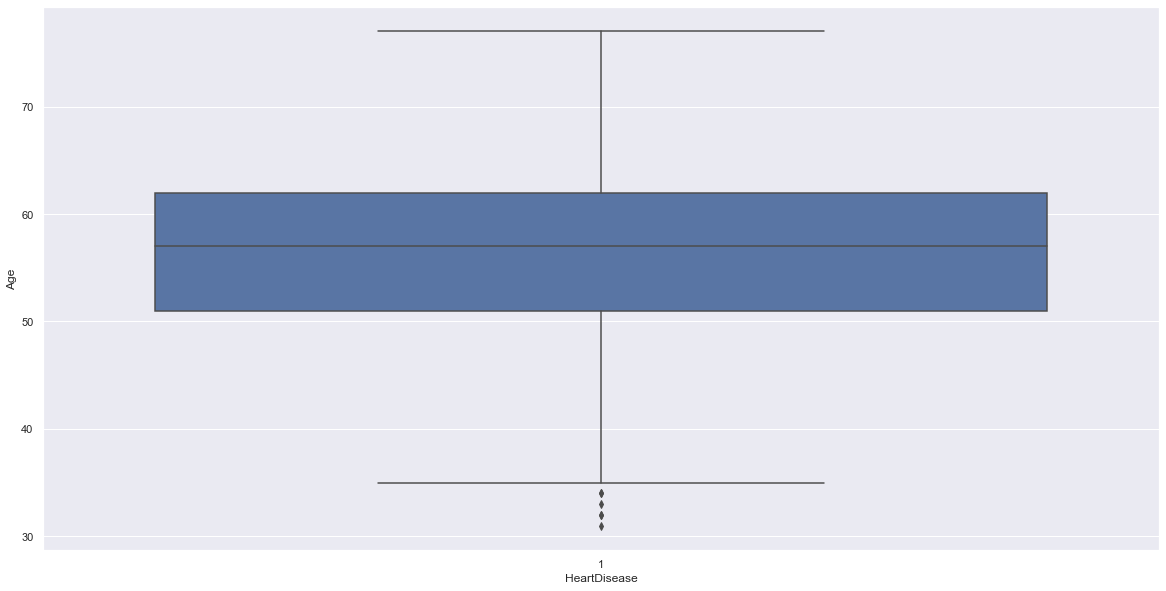

In [6]:
# To know the heart disease distribution over the age in our DF
hd_age = df[df.HeartDisease==1][['HeartDisease','Age']]
plt.figure(figsize=(20,10));
sns.boxplot(x="HeartDisease",y="Age",data=hd_age);

Q2 : What is the most common reasons for getting heart disease?

To answer Q2 we need to see the correlation between our DF colmuns. to achieve this I have run DF.corr() function then plot it as a heat map.

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


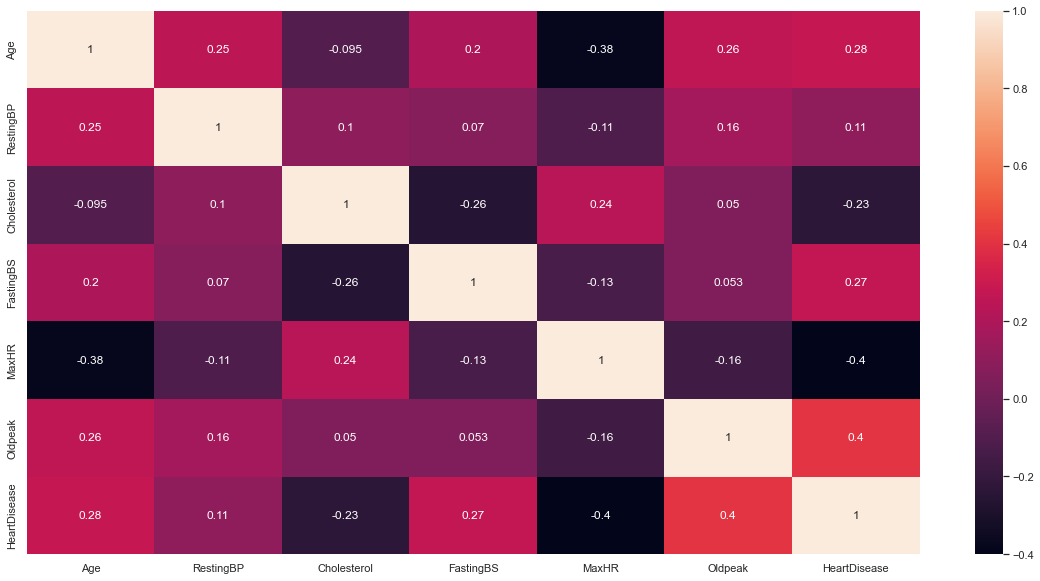

In [7]:
# in order to understand our DF variables correlations we excute the following 
plt.figure(figsize=(20,10))
df_corr = df.corr()
sns.heatmap(df_corr,annot=True);
df_corr

Q3: What is the type of chest pain and which ones are likely to be a heart disease?

To get this I have utilized (get_list()) function above (data prepration section). this function will return our df in the needed format to see the list of pain types with/without heart disease. 

In [118]:
count_pain = get_list(df)
count_pain

,Pain,Having HeartDisease,Do not have HeartDisease
0,ATA,24,149
1,NAP,72,131
2,ASY,392,104
3,TA,20,26


In [123]:
#let's add a total column 
count_pain['Total'] = count_pain['Having HeartDisease'] + count_pain['Do not have HeartDisease']
count_pain

,Pain,Having HeartDisease,Do not have HeartDisease,Total
0,ATA,24,149,173
1,NAP,72,131,203
2,ASY,392,104,496
3,TA,20,26,46


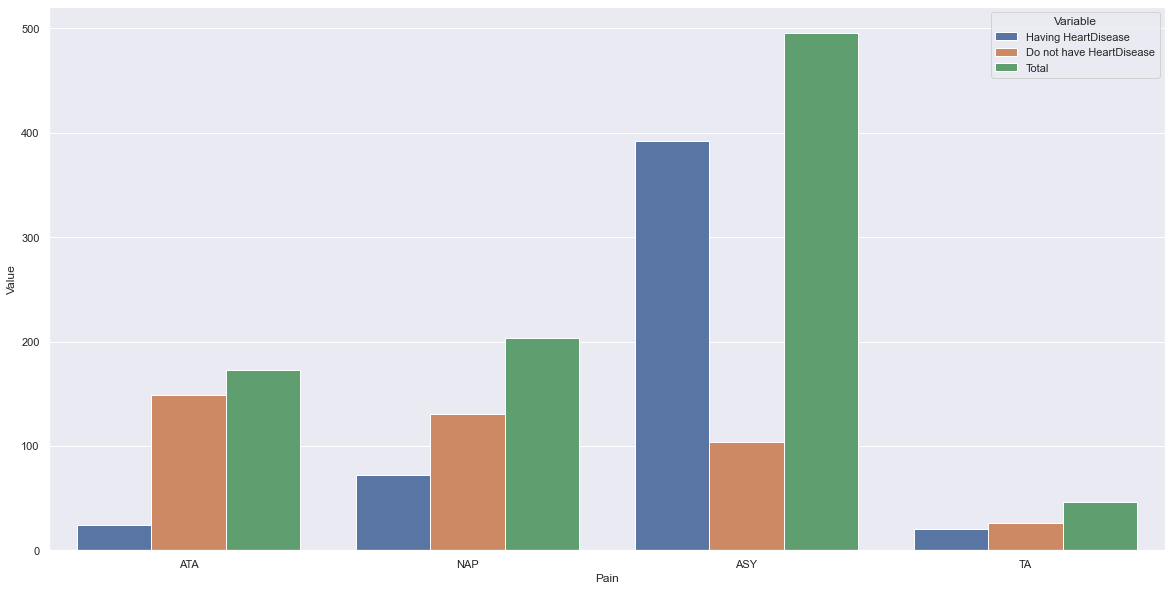

In [130]:
#now let's plot it
plt.figure(figsize=(20,10))
tidy = count_pain.melt(id_vars='Pain').rename(columns=str.title)
sns.barplot(data=tidy,y='Value',x='Pain',hue='Variable');